In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from lagged_coherence import *
import colorednoise as cn
import scipy

In [2]:
def sigmoid(x, x0, k):
    L=-1
    b=1
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

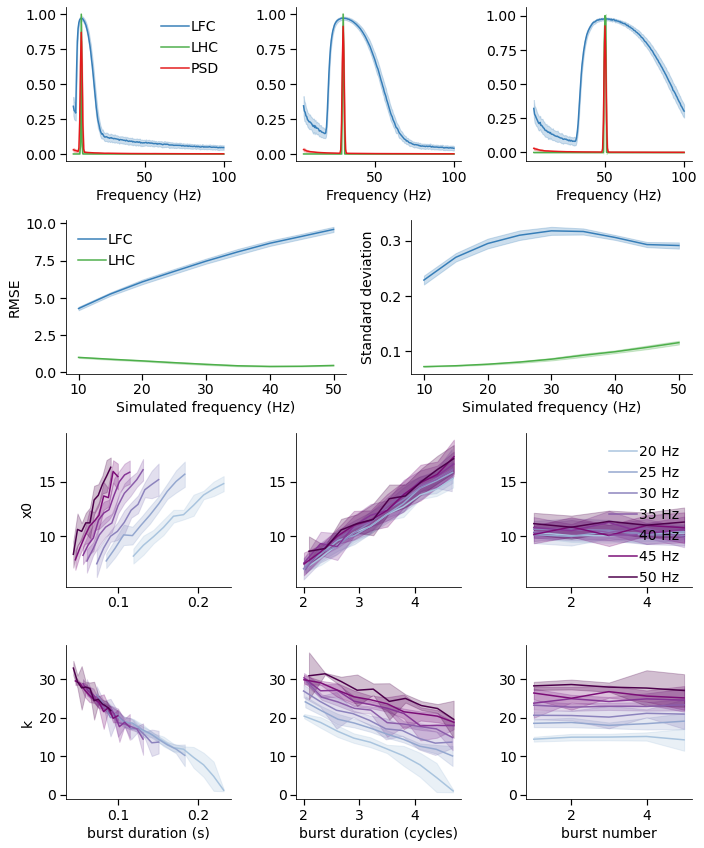

In [4]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

fig=plt.figure(figsize=(10,12))
gs = fig.add_gridspec(4,6)

lfc_color=np.array([55,126,184])/255
lhc_color=np.array([77,175,74])/255
psd_color=np.array([228,26,28])/255

f=np.load('../output/sims/oscillation/sim_results.npz')
freqs=f['freqs']
lcs_classic=f['lcs_classic']
lcs_hilbert=f['lcs_hilbert']
psds=f['psds']

trials=100
lags=np.arange(1,6.5,.5)
osc_f=np.arange(10,55,5)

classic_rmse = np.zeros((len(osc_f),trials))*np.nan
hilbert_rmse = np.zeros((len(osc_f),trials))*np.nan
classic_std = np.zeros((len(osc_f),trials))*np.nan
hilbert_std = np.zeros((len(osc_f),trials))*np.nan

for f_idx in range(len(osc_f)):
    for n in range(trials):
        lc_classic = lcs_classic[f_idx,n,:,:]
        lc_hilbert = lcs_hilbert[f_idx,n,:,:]

        f_psd_classic = np.nanmean(lc_classic,axis=1)
        classic_std[f_idx,n] = np.nanstd(f_psd_classic)
        f_psd_classic = f_psd_classic/np.nanmax(f_psd_classic)

        f_psd_hilbert = np.nanmean(lc_hilbert,axis=1)
        hilbert_std[f_idx,n] = np.nanstd(f_psd_hilbert)
        f_psd_hilbert = f_psd_hilbert/np.nanmax(f_psd_hilbert)

        f_psd = psds[f_idx,n,:]
        f_psd = f_psd/np.max(f_psd)

        classic_rmse[f_idx,n] = np.sqrt(np.nansum((f_psd_classic-f_psd)**2))
        hilbert_rmse[f_idx,n] = np.sqrt(np.nansum((f_psd_hilbert-f_psd)**2))
        
ax1 = fig.add_subplot(gs[0,0:2])
idx=0
mean_lc_classic=np.nanmean(lcs_classic[idx,:,:,:],axis=2)
mean_lc_classic=mean_lc_classic-np.nanmin(mean_lc_classic)
mean_lc_classic=mean_lc_classic/np.nanmax(mean_lc_classic)
mean_lc_hilbert=np.nanmean(lcs_hilbert[idx,:,:,:],axis=2)
mean_lc_hilbert=mean_lc_hilbert-np.nanmin(mean_lc_hilbert)
mean_lc_hilbert=mean_lc_hilbert/np.nanmax(mean_lc_hilbert)
mean_lc_hilbert[np.isnan(mean_lc_hilbert)]=0
psd=psds[idx,:,:]
psd=psd-np.nanmin(psd)
psd=psd/np.max(psd)
m_mean_lc_classic=np.nanmean(mean_lc_classic,axis=0)
sd_mean_lc_classic=np.nanstd(mean_lc_classic,axis=0)
m_mean_lc_hilbert=np.nanmean(mean_lc_hilbert,axis=0)
sd_mean_lc_hilbert=np.nanstd(mean_lc_hilbert,axis=0)
m_psd=np.nanmean(psd,axis=0)
sd_psd=np.nanstd(psd,axis=0)
ax1.plot(freqs,m_mean_lc_classic, label='LFC',color=lfc_color)
ax1.fill_between(freqs, 
                 m_mean_lc_classic-sd_mean_lc_classic, 
                 m_mean_lc_classic+sd_mean_lc_classic,
                 alpha=0.25,color=lfc_color)
ax1.plot(freqs,m_mean_lc_hilbert, label='LHC',color=lhc_color)
ax1.fill_between(freqs, 
                 m_mean_lc_hilbert-sd_mean_lc_hilbert, 
                 m_mean_lc_hilbert+sd_mean_lc_hilbert,
                 alpha=0.25,color=lhc_color)
ax1.plot(freqs,m_psd,label='PSD',color=psd_color)
ax1.fill_between(freqs, m_psd-sd_psd, m_psd+sd_psd,alpha=0.25,color=psd_color)
ax1.set_xlabel('Frequency (Hz)')
ax1.legend()

ax2 = fig.add_subplot(gs[0,2:4])
idx=4
mean_lc_classic=np.nanmean(lcs_classic[idx,:,:,:],axis=2)
mean_lc_classic=mean_lc_classic-np.nanmin(mean_lc_classic)
mean_lc_classic=mean_lc_classic/np.nanmax(mean_lc_classic)
mean_lc_hilbert=np.nanmean(lcs_hilbert[idx,:,:,:],axis=2)
mean_lc_hilbert=mean_lc_hilbert-np.nanmin(mean_lc_hilbert)
mean_lc_hilbert=mean_lc_hilbert/np.nanmax(mean_lc_hilbert)
mean_lc_hilbert[np.isnan(mean_lc_hilbert)]=0
psd=psds[idx,:,:]
psd=psd-np.nanmin(psd)
psd=psd/np.max(psd)
m_mean_lc_classic=np.nanmean(mean_lc_classic,axis=0)
sd_mean_lc_classic=np.nanstd(mean_lc_classic,axis=0)
m_mean_lc_hilbert=np.nanmean(mean_lc_hilbert,axis=0)
sd_mean_lc_hilbert=np.nanstd(mean_lc_hilbert,axis=0)
m_psd=np.nanmean(psd,axis=0)
sd_psd=np.nanstd(psd,axis=0)
ax2.plot(freqs,m_mean_lc_classic,color=lfc_color)
ax2.fill_between(freqs, 
                 m_mean_lc_classic-sd_mean_lc_classic, 
                 m_mean_lc_classic+sd_mean_lc_classic,
                 alpha=0.25,color=lfc_color)
ax2.plot(freqs,m_mean_lc_hilbert,color=lhc_color)
ax2.fill_between(freqs, 
                 m_mean_lc_hilbert-sd_mean_lc_hilbert, 
                 m_mean_lc_hilbert+sd_mean_lc_hilbert,
                 alpha=0.25,color=lhc_color)
ax2.plot(freqs,m_psd,color=psd_color)
ax2.fill_between(freqs, m_psd-sd_psd, m_psd+sd_psd,alpha=0.25,color=psd_color)
ax2.set_xlabel('Frequency (Hz)')

ax3 = fig.add_subplot(gs[0,4:6])
idx=-1
mean_lc_classic=np.nanmean(lcs_classic[idx,:,:,:],axis=2)
mean_lc_classic=mean_lc_classic-np.nanmin(mean_lc_classic)
mean_lc_classic=mean_lc_classic/np.nanmax(mean_lc_classic)
mean_lc_hilbert=np.nanmean(lcs_hilbert[idx,:,:,:],axis=2)
mean_lc_hilbert=mean_lc_hilbert-np.nanmin(mean_lc_hilbert)
mean_lc_hilbert=mean_lc_hilbert/np.nanmax(mean_lc_hilbert)
mean_lc_hilbert[np.isnan(mean_lc_hilbert)]=0
psd=psds[idx,:,:]
psd=psd-np.nanmin(psd)
psd=psd/np.max(psd)
m_mean_lc_classic=np.nanmean(mean_lc_classic,axis=0)
sd_mean_lc_classic=np.nanstd(mean_lc_classic,axis=0)
m_mean_lc_hilbert=np.nanmean(mean_lc_hilbert,axis=0)
sd_mean_lc_hilbert=np.nanstd(mean_lc_hilbert,axis=0)
m_psd=np.nanmean(psd,axis=0)
sd_psd=np.nanstd(psd,axis=0)
ax3.plot(freqs,m_mean_lc_classic,color=lfc_color)
ax3.fill_between(freqs, 
                 m_mean_lc_classic-sd_mean_lc_classic, 
                 m_mean_lc_classic+sd_mean_lc_classic,
                 alpha=0.25,color=lfc_color)
ax3.plot(freqs,m_mean_lc_hilbert,color=lhc_color)
ax3.fill_between(freqs, 
                 m_mean_lc_hilbert-sd_mean_lc_hilbert, 
                 m_mean_lc_hilbert+sd_mean_lc_hilbert,
                 alpha=0.25,color=lhc_color)
ax3.plot(freqs,m_psd,color=psd_color)
ax3.fill_between(freqs, m_psd-sd_psd, m_psd+sd_psd,alpha=0.25,color=psd_color)
ax3.set_xlabel('Frequency (Hz)')

ax4 = fig.add_subplot(gs[1,0:3])
m_classic=np.nanmean(classic_rmse,axis=1)
sd_classic=np.nanstd(classic_rmse,axis=1)
ax4.plot(osc_f,m_classic,label='LFC',color=lfc_color)
ax4.fill_between(osc_f,m_classic-sd_classic,m_classic+sd_classic,alpha=.25,color=lfc_color)
m_hilbert=np.nanmean(hilbert_rmse,axis=1)
sd_hilbert=np.nanstd(hilbert_rmse,axis=1)
ax4.plot(osc_f,m_hilbert,label='LHC',color=lhc_color)
ax4.fill_between(osc_f,m_hilbert-sd_hilbert,m_hilbert+sd_hilbert,alpha=.25,color=lhc_color)
ax4.legend()
ax4.set_xlabel('Simulated frequency (Hz)')
ax4.set_ylabel('RMSE')

ax5 = fig.add_subplot(gs[1,3:6])
m_classic=np.nanmean(classic_std,axis=1)
sd_classic=np.nanstd(classic_std,axis=1)
ax5.plot(osc_f,m_classic,label='LFC',color=lfc_color)
ax5.fill_between(osc_f,m_classic-sd_classic,m_classic+sd_classic,alpha=.25,color=lfc_color)
m_hilbert=np.nanmean(hilbert_std,axis=1)
sd_hilbert=np.nanstd(hilbert_std,axis=1)
ax5.plot(osc_f,m_hilbert,label='LHC',color=lhc_color)
ax5.fill_between(osc_f,m_hilbert-sd_hilbert,m_hilbert+sd_hilbert,alpha=.25,color=lhc_color)
ax5.set_xlabel('Simulated frequency (Hz)')
ax5.set_ylabel('Standard deviation')

freq_colors = plt.get_cmap('BuPu', 10)
f=np.load('../output/sims/burst_dur/sim_results.npz')
freqs=f['freqs']
lcs_classic=f['lcs_classic']
lcs_hilbert=f['lcs_hilbert']
psds=f['psds']
brst_d=f['brst_d']
brst_d_c=f['brst_d_c']
brst_n=f['brst_n']

trials=100
lags=np.arange(1,20.5,.5)
brst_f=np.arange(20,55,5)

ax6 = fig.add_subplot(gs[2,0:2])
ax7 = fig.add_subplot(gs[2,2:4])
ax8 = fig.add_subplot(gs[3,0:2])
ax9 = fig.add_subplot(gs[3,2:4])

for f_idx in range(len(brst_f)):
    f=brst_f[f_idx]
    lc_f_idx=np.argmin(np.abs(freqs-f))
    
    d_bursts=[]
    d_c_bursts=[]
    x0s_hilbert=[]
    ks_hilbert=[]
    for i in range(trials):
        lc_hilbert = lcs_hilbert[f_idx,i,:,:]
        d_bursts.append(brst_d[f_idx,i])
        d_c_bursts.append(brst_d_c[f_idx,i])

        b_lc_hilbert=lc_hilbert[lc_f_idx,:]
        p0 = [np.median(lags),3]
        popt, pcov = curve_fit(sigmoid, lags, b_lc_hilbert, p0, method='lm',maxfev=100000)
        x0s_hilbert.append(popt[0])
        ks_hilbert.append(popt[1])
    d_bursts=np.array(d_bursts)
    d_c_bursts=np.array(d_c_bursts)

    x0s_hilbert=np.array(x0s_hilbert)
    ks_hilbert=np.array(ks_hilbert)

    d_bin_edges = np.linspace(np.percentile(d_bursts,5), np.percentile(d_bursts,95), 11)
    d_bin_indices = np.digitize(d_bursts, d_bin_edges)

    d_mean_x0s_hilbert = np.array([np.mean(np.array(x0s_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])
    d_std_x0s_hilbert = np.array([np.std(np.array(x0s_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])                
    d_mean_ks_hilbert = np.array([np.mean(np.array(ks_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])
    d_std_ks_hilbert = np.array([np.std(np.array(ks_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])

    ax6.plot(d_bin_edges[:-1],d_mean_x0s_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
    ax6.fill_between(d_bin_edges[:-1],
                     d_mean_x0s_hilbert-d_std_x0s_hilbert, 
                     d_mean_x0s_hilbert+d_std_x0s_hilbert, 
                     alpha=0.25, color=freq_colors(f_idx+3))
    ax8.plot(d_bin_edges[:-1],d_mean_ks_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
    ax8.fill_between(d_bin_edges[:-1],
                     d_mean_ks_hilbert-d_std_ks_hilbert, 
                     d_mean_ks_hilbert+d_std_ks_hilbert, 
                     alpha=0.25, color=freq_colors(f_idx+3))

    d_c_bin_edges = np.linspace(np.min(d_c_bursts), np.max(d_c_bursts), 11)
    d_c_bin_indices = np.digitize(d_c_bursts, d_c_bin_edges)
    d_c_mean_x0s_hilbert = np.array([np.mean(np.array(x0s_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])
    d_c_std_x0s_hilbert = np.array([np.std(np.array(x0s_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])        
    d_c_mean_ks_hilbert = np.array([np.mean(np.array(ks_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])
    d_c_std_ks_hilbert = np.array([np.std(np.array(ks_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])

    ax7.plot(d_c_bin_edges[:-1],d_c_mean_x0s_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
    ax7.fill_between(d_c_bin_edges[:-1],
                     d_c_mean_x0s_hilbert-d_c_std_x0s_hilbert, 
                     d_c_mean_x0s_hilbert+d_c_std_x0s_hilbert, 
                     alpha=0.25, color=freq_colors(f_idx+3))
    ax9.plot(d_c_bin_edges[:-1],d_c_mean_ks_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
    ax9.fill_between(d_c_bin_edges[:-1],
                     d_c_mean_ks_hilbert-d_c_std_ks_hilbert, 
                     d_c_mean_ks_hilbert+d_c_std_ks_hilbert, 
                     alpha=0.25, color=freq_colors(f_idx+3))
ax6.set_ylabel('x0')
ax8.set_xlabel('burst duration (s)')
ax8.set_ylabel('k')
ax9.set_xlabel('burst duration (cycles)')

f=np.load('../output/sims/burst_num/sim_results.npz')
freqs=f['freqs']
lcs_classic=f['lcs_classic']
lcs_hilbert=f['lcs_hilbert']
psds=f['psds']
brst_n=f['brst_n']

trials=100
lags=np.arange(1,20.5,.5)
brst_f=np.arange(20,55,5)

ax10 = fig.add_subplot(gs[2,4:6])
ax11 = fig.add_subplot(gs[3,4:6])

for f_idx in range(len(brst_f)):
    f=brst_f[f_idx]
    lc_f_idx=np.argmin(np.abs(freqs-f))
    
    n_bursts=[]
    x0s_hilbert=[]
    ks_hilbert=[]
    for i in range(trials):
        lc_hilbert = lcs_hilbert[f_idx,i,:,:]
        n_bursts.append(brst_n[f_idx,i])

        b_lc_hilbert=lc_hilbert[lc_f_idx,:]
        p0 = [np.median(lags),3]
        popt, pcov = curve_fit(sigmoid, lags, b_lc_hilbert, p0, method='lm',maxfev=100000)
        x0s_hilbert.append(popt[0])
        ks_hilbert.append(popt[1])
    n_bursts=np.array(n_bursts)

    ks_hilbert=np.array(ks_hilbert)

    n_bin_edges = np.arange(1,7)
    n_bin_indices = np.digitize(n_bursts, n_bin_edges)
    n_mean_x0s_hilbert = np.array([np.mean(np.array(x0s_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])
    n_std_x0s_hilbert = np.array([np.std(np.array(x0s_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])        

    n_bin_edges = np.arange(1,7)
    n_bin_indices = np.digitize(n_bursts, n_bin_edges)
    n_mean_ks_hilbert = np.array([np.mean(np.array(ks_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])
    n_std_ks_hilbert = np.array([np.std(np.array(ks_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])

    ax10.plot(n_bin_edges[:-1],n_mean_x0s_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
    ax10.fill_between(n_bin_edges[:-1],
                      n_mean_x0s_hilbert-n_std_x0s_hilbert, 
                      n_mean_x0s_hilbert+n_std_x0s_hilbert, 
                      alpha=0.25, color=freq_colors(f_idx+3))
    ax11.plot(n_bin_edges[:-1],n_mean_ks_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
    ax11.fill_between(n_bin_edges[:-1],
                      n_mean_ks_hilbert-n_std_ks_hilbert, 
                      n_mean_ks_hilbert+n_std_ks_hilbert, 
                      alpha=0.25, color=freq_colors(f_idx+3))
                
ax10.legend()

ax11.set_xlabel('burst number')

x0_ymin=np.min([ax6.get_ylim()[0], ax7.get_ylim()[0], ax10.get_ylim()[0]])
x0_ymax=np.max([ax6.get_ylim()[1], ax7.get_ylim()[1], ax10.get_ylim()[1]])
ax6.set_ylim([x0_ymin, x0_ymax])
ax7.set_ylim([x0_ymin, x0_ymax])
ax10.set_ylim([x0_ymin, x0_ymax])

k_ymin=np.min([ax8.get_ylim()[0], ax9.get_ylim()[0], ax11.get_ylim()[0]])
k_ymax=np.max([ax8.get_ylim()[1], ax9.get_ylim()[1], ax11.get_ylim()[1]])
ax8.set_ylim([k_ymin, k_ymax])
ax9.set_ylim([k_ymin, k_ymax])
ax11.set_ylim([k_ymin, k_ymax])

plt.tight_layout()

fig.savefig('../output/figures/figure_2.svg')
fig.savefig('../output/figures/figure_2.png')